
Audio Classification Data Preprocessing

In [138]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='fold5/100263-2-0-117.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [139]:
print(librosa_audio_data)

[ 0.00274057  0.00363865  0.00230643 ... -0.00752703 -0.00462696
  0.00097316]


In [140]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt

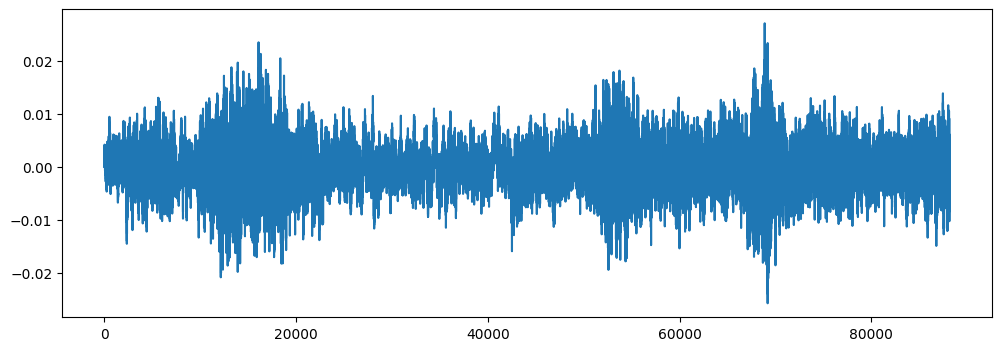

In [141]:
# Original audio with 1 channel 
plt.figure(figsize=(12, 4)) # inch
plt.plot(librosa_audio_data)


Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [142]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [143]:
wave_audio

array([[ 171,   63],
       [ 157,   86],
       [ 130,   96],
       ...,
       [  70, -205],
       [ 202, -159],
       [ 283,  -81]], dtype=int16)

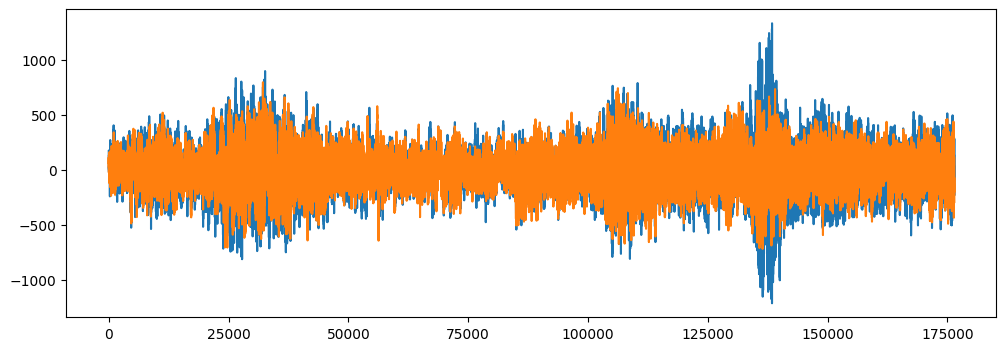

In [144]:

import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)


Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification

In [145]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [146]:
mfccs

array([[-4.8605615e+02, -4.4730463e+02, -4.4184772e+02, ...,
        -4.2249927e+02, -4.1990121e+02, -4.3479315e+02],
       [ 9.0492447e+01,  9.8961349e+01,  9.8793587e+01, ...,
         7.7359344e+01,  7.3746559e+01,  7.3074295e+01],
       [-1.6820309e+01, -1.2406609e+01, -1.5042483e+01, ...,
        -3.1668327e+01, -2.8136137e+01, -2.9968544e+01],
       ...,
       [ 4.1776438e+00,  1.9898348e+00,  3.1377420e+00, ...,
        -1.1930801e+01, -7.6285996e+00, -3.6759269e+00],
       [ 2.8205299e-01, -6.1229259e-01,  1.0903190e+00, ...,
         1.2085965e+01,  1.3864529e+01,  1.1060384e+01],
       [-8.9769858e-01,  3.0010545e+00,  5.2202482e+00, ...,
         1.2405747e+01,  9.6569347e+00,  5.0198388e+00]], dtype=float32)

In [147]:

#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa


metadata=pd.read_csv('UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [148]:
import numpy as np

Librosa's mfcc() function computes Mel-Frequency Cepstral Coefficients (MFCCs) from an audio signal.
MFCCs:
Represent audio features in a compact, numerical format.
Widely used in speech recognition, music information retrieval, and audio classification.

Librosa's mfcc() function computes Mel-Frequency Cepstral Coefficients (MFCCs) from an audio signal.
MFCCs:
Represent audio features in a compact, numerical format.
Widely used in speech recognition, music information retrieval, and audio classification.

In [149]:
# y: Audio time series (librosa_audio_data)
# sr: Sample rate (librosa_sample_rate)
# n_mfcc: Number of MFCCs to extract (default=20)
# dct_type: Type of Discrete Cosine Transform (default=2)
# norm: Normalization type (default='ortho')
# Explanation:
# Mel-Frequency Spectrogram: Compute spectrogram with Mel-scale frequency bins.


n_mfcc=40 extracts 40 coefficients, providing more detailed representation.


In [150]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name) 
    # print(audio)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    # print(mfccs_scaled_features)
    
    return mfccs_scaled_features

In [151]:

import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients


In [152]:
# audio_dataset_path='UrbanSound8K/audio/'

In [153]:
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    # file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    file_name = os.path.join('fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    # print(file_name)
    final_class_labels=row["class"]

    data=features_extractor(file_name)
    
    # print(data)
    extracted_features.append([data,final_class_labels])

0it [00:00, ?it/s]

3555it [03:18, 14.47it/s]d:\a27_YEARS_OLD\audio_classification\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [06:34, 35.96it/s]d:\a27_YEARS_OLD\audio_classification\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
d:\a27_YEARS_OLD\audio_classification\venv\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [06:48, 21.39it/s]


In [154]:

### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-211.93698, 62.581207, -122.81315, -60.745293...",dog_bark
1,"[-417.0052, 99.336624, -42.995586, 51.073326, ...",children_playing
2,"[-452.39316, 112.36253, -37.578068, 43.195866,...",children_playing
3,"[-406.47922, 91.1966, -25.043556, 42.78452, 11...",children_playing
4,"[-439.63873, 103.86223, -42.658787, 50.690277,...",children_playing


In [155]:
x1=np.array(extracted_features_df['feature'])

In [156]:
y1 = np.array(extracted_features_df['class'])

In [157]:
x1[:1]

array([array([-2.1193698e+02,  6.2581207e+01, -1.2281315e+02, -6.0745293e+01,
              -1.3893760e+01, -2.9789835e+01, -3.9788749e+00,  1.1682742e+01,
               1.2963828e+01,  8.3364210e+00, -6.5298190e+00, -2.9961064e+00,
              -1.2887950e+01,  5.8859324e+00, -2.4752254e+00, -4.4083118e+00,
              -1.5014478e+01, -9.4399697e-01, -2.5799103e+00,  6.0982966e+00,
              -1.0786229e+01, -8.0634775e+00,  5.8440900e+00, -3.1225376e+00,
              -5.9842277e+00, -7.9944745e-02, -3.6870894e+00,  4.7476764e+00,
              -6.5300946e+00, -5.0838842e+00,  4.8772603e-01,  7.5108857e+00,
              -8.8535994e-01,  2.3938141e+00, -6.3923717e+00, -2.1318593e+00,
               2.2760150e+00, -7.9108363e-01, -1.5400676e+00,  1.3211496e+00],
             dtype=float32)                                                   ],
      dtype=object)

In [158]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())

In [159]:
X[:1]

array([[-2.1193698e+02,  6.2581207e+01, -1.2281315e+02, -6.0745293e+01,
        -1.3893760e+01, -2.9789835e+01, -3.9788749e+00,  1.1682742e+01,
         1.2963828e+01,  8.3364210e+00, -6.5298190e+00, -2.9961064e+00,
        -1.2887950e+01,  5.8859324e+00, -2.4752254e+00, -4.4083118e+00,
        -1.5014478e+01, -9.4399697e-01, -2.5799103e+00,  6.0982966e+00,
        -1.0786229e+01, -8.0634775e+00,  5.8440900e+00, -3.1225376e+00,
        -5.9842277e+00, -7.9944745e-02, -3.6870894e+00,  4.7476764e+00,
        -6.5300946e+00, -5.0838842e+00,  4.8772603e-01,  7.5108857e+00,
        -8.8535994e-01,  2.3938141e+00, -6.3923717e+00, -2.1318593e+00,
         2.2760150e+00, -7.9108363e-01, -1.5400676e+00,  1.3211496e+00]],
      dtype=float32)

In [160]:
y=np.array(extracted_features_df['class'].tolist())
y[:1]

array(['dog_bark'], dtype='<U16')

In [161]:
X.shape

(8732, 40)

In [162]:

y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [163]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

In [164]:
labelencoder=LabelEncoder()
y = labelencoder.fit_transform(y)

In [165]:
print(y)

[3 2 2 ... 1 1 1]


In [166]:
y = to_categorical(y)

In [167]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [168]:
import numpy as np

# Create a sample array
data = np.array([1, 2, 3])

# Check data type
print(data.dtype)

# Check shape
print(data.shape)

int64
(3,)


In [169]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [170]:

X_train

array([[-1.24484688e+02,  1.03169846e+02, -1.33165474e+01, ...,
         4.72908735e+00, -2.91925478e+00,  4.36318684e+00],
       [-5.13921928e+00,  7.90478210e+01,  4.16248989e+00, ...,
        -3.44017506e+00, -5.19278288e+00, -1.54999769e+00],
       [-4.03939552e+01, -1.31092958e+01, -7.20987701e+00, ...,
         1.99475384e+00, -8.70601475e-01,  2.89561915e+00],
       ...,
       [-4.26655701e+02,  9.15513382e+01,  4.19170332e+00, ...,
         9.74399984e-01,  5.15445411e-01,  9.15374815e-01],
       [-1.37251968e+02,  1.24268539e+02, -2.15997734e+01, ...,
         1.25008631e+00, -1.89575124e+00, -9.01497185e-01],
       [-4.18389374e+02,  2.06862335e+02,  7.23461866e+00, ...,
        -3.98612165e+00, -4.71784496e+00, -2.78925896e-01]], dtype=float32)

In [171]:

y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [172]:

X_train.shape

(6985, 40)

In [173]:

X_test.shape

(1747, 40)

In [174]:

y_train.shape

(6985, 10)

In [175]:

y_test.shape

(1747, 10)


Model Creation

In [176]:

import tensorflow as tf
print(tf.__version__)

2.17.0


In [177]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [178]:
y.shape

(8732, 10)

In [179]:
### No of classes
num_labels=y.shape[1]

In [180]:
num_labels

10

In [181]:
model=Sequential()

###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))




d:\a27_YEARS_OLD\audio_classification\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [182]:
# Key Concepts:
# Dense: Fully connected layers
# ReLU: Rectified Linear Unit activation function
# Dropout: Regularization technique to prevent overfitting
# Softmax: Output layer activation function for multi-class classification
# Hyperparameters:
# Neuron counts: 100, 200, 100
# Dropout rates: 0.5
# Activation functions: ReLU, Softmax

In [183]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 100)            │         4,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        20,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
# oss Function
# loss='categorical_crossentropy':
# Measures difference between predicted probabilities and true labels.
# Suitable for multi-class classification problems.
# Calculates cross-entropy loss between predicted and actual probabilities.
# Metrics
# metrics=['accuracy']:
# Tracks accuracy during training and
# testing.
# Calculates ratio of correctly classified samples to total samples.
# Optimizer
# optimizer='adam':
# Adaptive learning rate optimization
# algorithm.
# Updates weights based on gradient descent and momentum.
# Other Options:
# Loss Functions
# mean_squared_error (MSE)
# mean_absolute_error (MAE)
# binary_crossentropy
# Metrics
# precision
# recall
# f1-score
# auc-roc
# Optimizers
# sgd (Stochastic Gradient Descent)
# rmsprop
# adagrad
# adamax
# Adam Optimizer Parameters:
# learning_rate (default=0.001)
# beta_1 (default=0.9)
# beta_2 (default=0.999)
# epsilon (default=1e-8)
# Example with Custom Parameters:
# Python
# model.compile(loss='categorical_crossentropy',
#               metrics=['accuracy'],
#               optimizer=Adam(lr=0.01, beta_1=0.95, beta_2=0.999))
# Compilation Process:
# Model architecture definition
# Compilation with loss, metrics, and optimizer
# Training with fit() method
# Tips:
# Choose loss function and metrics based on problem type.
# Experiment with different optimizers and parameters.
# Monitor performance on validation set during training.
# Do you have questions about model compilation or optimization?\auc-roc
# Optimizers
# sgd (Stochastic Gradient Descent)
# rmsprop
# adagrad
# adamax
# Adam Optimizer Parameters:
# learning_rate (default=0.001)
# beta_1 (default=0.9)
# beta_2 (default=0.999)
# epsilon (default=1e-8)


In [185]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [186]:
import numpy as np

In [187]:

## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

In [188]:
X_train.dtype

dtype('float32')

In [189]:
y_train.dtype

dtype('float64')

In [190]:
labelencoder=LabelEncoder()
y1 = labelencoder.fit_transform(y1)

In [191]:
y1 = to_categorical(y1)

In [192]:
# X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=0)

In [193]:
num_epochs = 2
num_batch_size = 8

In [194]:
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.keras', 
                               verbose=1, save_best_only=True)

In [197]:

# X_train=np.asarray(X_train).astype(np.int_)

# y_train=np.asarray(y_train).astype(np.int_)

In [ ]:
# Verbose is a term used to describe the level of detail or output provided by a program, function, or process.
# Verbose Levels:
# 0: Silent or minimal output
# 1: Brief or summary output
# 2: Detailed or verbose output
# Keras Verbose:
# In Keras, verbose controls the level of output during training:
# 0: No output
# 1: Progress bar
# 2: One-line summary per epoch

In [199]:
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

ValueError: object __array__ method not producing an array

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

In [1]:

prediction_feature.shape

NameError: name 'prediction_feature' is not defined

In [ ]:
X_test[1]

In [ ]:

model.predict_classes(X_test)

Testing Some Test Audio Data
Steps

Preprocess the new audio data
predict the classes
Invere transform your Predicted Label

In [ ]:
filename="UrbanSound8K/drilling_1.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class